## Testing the BPASS cluster at 10^9 years age.
Here, I try to create a 10000 solar mass BPASS cluster and ResolvedCluster. **This is to demonstrate the issue I have with the mass-matching inside of the Binary_Cluster implementation.**

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
import numpy as np
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(9.0, 0.7, 100,math.log10(1), mass_sampling=1, filepath='/g/lu/scratch/ryotainagaki/BPASS_iso_filesTimedIsolated/')

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1794: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to logg=5.00 for T= 23286 logg=5.78
Changing to logg=5.00 for T= 17733 logg=5.24
Changing to logg=5.00 for T= 24377 logg=5.87
Changing to logg=5.00 for T= 24403 logg=5.91
Changing to logg=5.00 for T= 26316 logg=5.57
Changing to logg=5.00 for T= 26930 logg=5.65
Changing to logg=5.00 for T= 24518 logg=6.01
Changing to logg=5.00 for T= 25618 logg=5.53
Changing to logg=5.00 for T= 26119 logg=5.75
Changing to logg=5.00 for T= 24305 logg=6.01
Changing to logg=5.00 for T= 26134 logg=5.73
Changing to logg=5.00 for T= 16799 logg=5.12
Changing to logg=5.00 for T= 20198 logg=5.51
Changing to logg=5.00 for T= 27134 logg=5.64
Changing to logg=5.00 for T= 26114 logg=5.72
Changing to logg=5.00 for T= 24452 logg=5.99
Changing to logg=5.00 for T= 22084 logg=5.78
Changing to logg=5.00 for T= 22961 logg=5.92
Changing to logg=5.00 for T= 21333 logg=5.59
Changing to logg=5.00 for T= 23774 logg=6.99
Changing to logg=5.00 for T= 23264 logg=5.77
Changing to logg=5.00 for T= 23096 logg=5.56
Changing t

Starting synthetic photometry
Singles
M =   1.440 Msun  T =  6673 K  m_ubv_V = 18.36
M =   3.200 Msun  T = 10963 K  m_ubv_V = 27.51
Primaries
M =   0.398 Msun  T =   nan K  m_ubv_V =  nan
M =   3.200 Msun  T = 11170 K  m_ubv_V = 27.73
M =   1.000 Msun  T =   nan K  m_ubv_V =  nan
M =   2.000 Msun  T =  7188 K  m_ubv_V = 16.54
M =   1.000 Msun  T =   nan K  m_ubv_V =  nan
M =   5.000 Msun  T = 11503 K  m_ubv_V = 27.98
M =   0.631 Msun  T =   nan K  m_ubv_V =  nan
M =   1.259 Msun  T =   nan K  m_ubv_V =  nan
M =   0.794 Msun  T =   nan K  m_ubv_V =  nan
M =   3.200 Msun  T = 10978 K  m_ubv_V = 27.51
M =   1.400 Msun  T =   nan K  m_ubv_V =  nan
M =   4.000 Msun  T = 11435 K  m_ubv_V = 27.74
M =   2.000 Msun  T =  7250 K  m_ubv_V = 16.55
M =   2.100 Msun  T =  6638 K  m_ubv_V = 16.26
M =   3.500 Msun  T = 12654 K  m_ubv_V = 27.82
M =   1.700 Msun  T =  7133 K  m_ubv_V = 16.59
M =   1.800 Msun  T =  7355 K  m_ubv_V = 17.20
M =   2.000 Msun  T =  7250 K  m_ubv_V = 16.55
M =   1.400 Msun  T

M =   1.500 Msun  T =  7084 K  m_ubv_B = 19.75
M =   1.200 Msun  T =  6155 K  m_ubv_B = 20.99
M =   7.000 Msun  T = 17707 K  m_ubv_B = 29.62
M =   0.740 Msun  T =   nan K  m_ubv_B =  nan
M =   1.920 Msun  T =  8764 K  m_ubv_B = 18.48
M =   1.800 Msun  T =  7808 K  m_ubv_B = 18.62
M =   0.900 Msun  T =  5193 K  m_ubv_B = 22.60
M =   4.000 Msun  T = 11312 K  m_ubv_B = 14.59
Starting filter: ubv,R   Elapsed time: 80.18 seconds
Starting synthetic photometry
Singles
M =   1.440 Msun  T =  6673 K  m_ubv_R = 15.49
M =   3.200 Msun  T = 10963 K  m_ubv_R = 24.87
Primaries
M =   0.398 Msun  T =   nan K  m_ubv_R =  nan
M =   3.200 Msun  T = 11170 K  m_ubv_R = 25.09
M =   1.000 Msun  T =   nan K  m_ubv_R =  nan
M =   2.000 Msun  T =  7188 K  m_ubv_R = 13.74
M =   1.000 Msun  T =   nan K  m_ubv_R =  nan
M =   5.000 Msun  T = 11503 K  m_ubv_R = 25.35
M =   0.631 Msun  T =   nan K  m_ubv_R =  nan
M =   1.259 Msun  T =   nan K  m_ubv_R =  nan
M =   0.794 Msun  T =   nan K  m_ubv_R =  nan
M =   3.200 M

M =   1.200 Msun  T =  5961 K  m_ubv_I = 12.65
M =   0.600 Msun  T =  3462 K  m_ubv_I = 15.73
M =   0.600 Msun  T =  3950 K  m_ubv_I = 15.85
M =   0.570 Msun  T =  3878 K  m_ubv_I = 16.05
M =   3.000 Msun  T = 11498 K  m_ubv_I = 21.24
M =   1.400 Msun  T =  6747 K  m_ubv_I = 11.89
M =   0.340 Msun  T =  1962 K  m_ubv_I = 19.95
M =   0.720 Msun  T =  4155 K  m_ubv_I = 14.72
M =   2.000 Msun  T =  7108 K  m_ubv_I = 10.03
M =   1.500 Msun  T =  7084 K  m_ubv_I = 11.71
M =   1.200 Msun  T =  6155 K  m_ubv_I = 12.58
M =   7.000 Msun  T = 17707 K  m_ubv_I = 22.87
M =   0.740 Msun  T =   nan K  m_ubv_I =  nan
M =   1.920 Msun  T =  8764 K  m_ubv_I = 10.90
M =   1.800 Msun  T =  7808 K  m_ubv_I = 10.80
M =   0.900 Msun  T =  5193 K  m_ubv_I = 13.65
M =   4.000 Msun  T = 11312 K  m_ubv_I = 7.43
      Time taken: 134.25 seconds
Isochrone generation took 370.792576 s.


In [2]:
iso1.primaries[np.where(iso1.primaries['mass']< 0)]

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64


In [3]:
iso1.secondaries[np.where(iso1.secondaries['mass'] < 0)]

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64,float64,float64,float64,float64


In [4]:
iso1.secondaries[np.where(iso1.singles['mass'] < 0)]

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64,float64,float64,float64,float64


For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101. Note that we will have a phase of 110 in order to indicate a mystery compact remnant that BPASS provides for NEWSECMODS (secondary star models with compact primaries). This is since we haven't added neutron stars or black holes yet. Stars with phase of -99 exist, and those are the secondary stars that have already merged.

In [5]:
iso2=synthetic.IsochronePhot(9.0, 0.7, 100, math.log10(1), mass_sampling =1 , recomp=True) # New MIST v.1 isochrone for same metallicity

Isochrone generation took 82.923034 s.
Making photometry for isochrone: log(t) = 9.00  AKs = 0.70  dist = 100
     Starting at:  2021-01-08 01:23:32.274266   Usually takes ~5 minutes
Starting filter: ubv,U   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.106 Msun  T =  2909 K  m_ubv_U = 33.40
M =   1.215 Msun  T =  6415 K  m_ubv_U = 20.55
M =   2.038 Msun  T =  7816 K  m_ubv_U = 17.29
M =   2.055 Msun  T =  4955 K  m_ubv_U = 19.05
M =   2.071 Msun  T =  4749 K  m_ubv_U = 18.64
M =   2.275 Msun  T =  4576 K  m_ubv_U = 18.06
M =   2.287 Msun  T =  3677 K  m_ubv_U = 17.25
M =   2.287 Msun  T =  3493 K  m_ubv_U = 17.19
M =   2.287 Msun  T =  3478 K  m_ubv_U = 17.19
M =   2.288 Msun  T =  3244 K  m_ubv_U = 17.39
M =   2.288 Msun  T =  3188 K  m_ubv_U = 17.69
M =   2.288 Msun  T = 29326 K  m_ubv_U = 12.80
M =   2.288 Msun  T = 134813 K  m_ubv_U = 17.53
Starting filter: ubv,B   Elapsed time: 3.20 seconds
Starting synthetic photometry
M =   0.106 Msun  T =  2909 K  m_ubv_B = 

In [6]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr

Make the clusters corresponding to the binary star isochrone and the MISTv.1 isochrone

In [7]:
clus_1=synthetic.Cluster_w_Binaries(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 10000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityUnresolved()), 10000, ifmr=ifmr.IFMR_Spera15())

/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:2977: RuntimeWarning: overflow encountered in power
  10 ** iso.secondaries['log_a']])))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


736 star systems had to be deleted
762 companions had to be deleted
Found 167 companions out of stellar mass range


Let's make sure that I am getting just about enough star mass for my cluster. (It was a bug before I used an adjustment factor.)

In [8]:
clus_1.star_systems['systemMass'].sum()

6743.40950221685

In [9]:
arr =[]
for x in range(100):
    clus_1=synthetic.Cluster_w_Binaries(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 10000, ifmr=ifmr.IFMR_Spera15())
    arr.append(clus_1.star_systems['systemMass'].sum())

690 star systems had to be deleted
722 companions had to be deleted
738 star systems had to be deleted
772 companions had to be deleted
736 star systems had to be deleted
775 companions had to be deleted
768 star systems had to be deleted
802 companions had to be deleted
704 star systems had to be deleted
736 companions had to be deleted
712 star systems had to be deleted
750 companions had to be deleted
746 star systems had to be deleted
781 companions had to be deleted
729 star systems had to be deleted
759 companions had to be deleted
699 star systems had to be deleted
729 companions had to be deleted
764 star systems had to be deleted
811 companions had to be deleted
728 star systems had to be deleted
755 companions had to be deleted
715 star systems had to be deleted
749 companions had to be deleted
758 star systems had to be deleted
794 companions had to be deleted
715 star systems had to be deleted
755 companions had to be deleted
711 star systems had to be deleted
738 companion

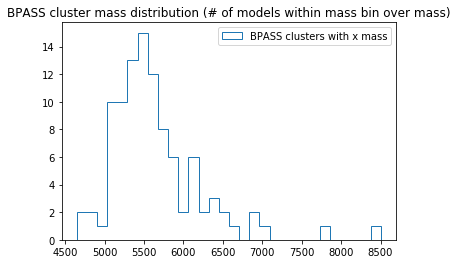

In [10]:
import matplotlib.pyplot as plt
hist, bins, patch = plt.hist(np.array(arr), bins=30, histtype='step', label='BPASS clusters with x mass')
plt.title("BPASS cluster mass distribution (# of models within mass bin over mass)")
plt.xlabel("initial mass of BPASS cluster in solar masses")
plt.legend()

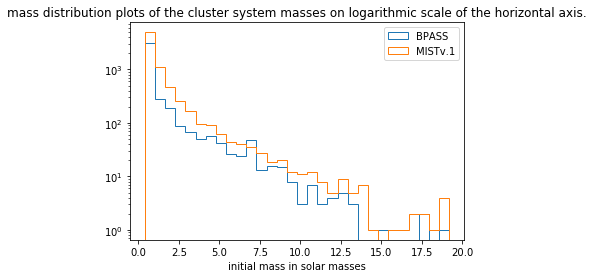

In [11]:
hist, bins, patch = plt.hist(clus_1.star_systems['systemMass'], bins=30, histtype='step', label='BPASS')
plt.hist(clus_2.star_systems['systemMass'], bins=bins, histtype='step', label='MISTv.1')
plt.yscale('log')
plt.title("mass distribution plots of the cluster system masses on logarithmic scale of the horizontal axis.")
plt.xlabel("initial mass in solar masses")
plt.legend()

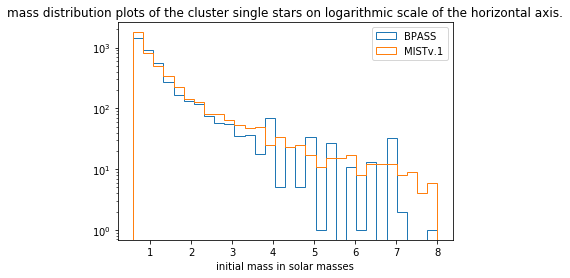

In [12]:
hist, bins, patch = plt.hist(clus_1.star_systems['mass'], bins=30, histtype='step', label='BPASS')
plt.hist(clus_2.star_systems['mass'], bins=bins, histtype='step', label='MISTv.1')
plt.title("mass distribution plots of the cluster single stars on logarithmic scale of the horizontal axis.")
plt.xlabel("initial mass in solar masses")
plt.yscale('log')
plt.legend()

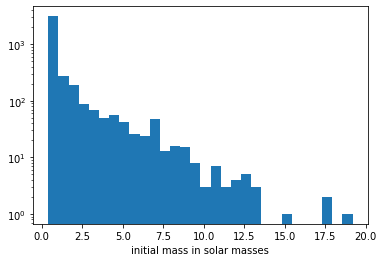

In [13]:
import matplotlib.pyplot as plt
plt.hist(clus_1.star_systems['systemMass'], bins=30)
plt.xlabel("initial mass in solar masses")
plt.yscale('log')

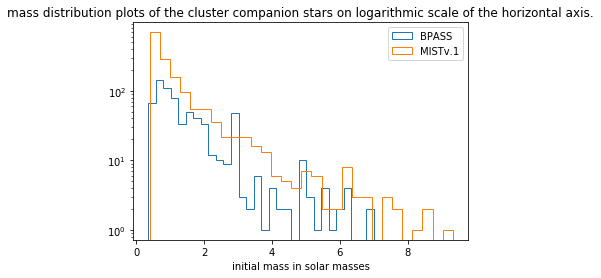

In [14]:
hist, bins, patch = plt.hist(clus_1.companions['mass'], bins=30, histtype='step', label='BPASS')
plt.hist(clus_2.companions['mass'], bins=30, histtype='step', label='MISTv.1')
plt.yscale('log')
plt.xlabel("initial mass in solar masses")
plt.title("mass distribution plots of the cluster companion stars on logarithmic scale of the horizontal axis.")
plt.legend()

In [15]:
# Please compare me with the MIST v1 cluster mass
clus_2.star_systems['systemMass'].sum()

9998.603789889334

Text(0.5, 1.0, "mass distribution plots of the isochrone_binary's primaries on logarithmic scale of the horizontal axis.")

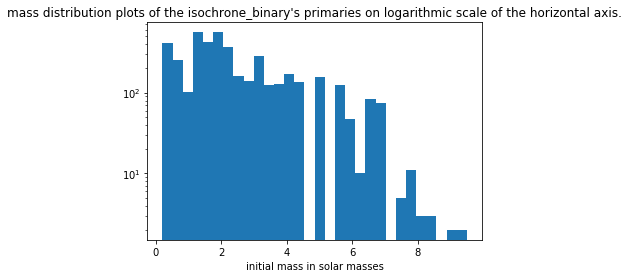

In [16]:
import matplotlib.pyplot as plt
plt.hist(iso1.primaries['mass'], bins=30)
plt.yscale('log')
plt.xlabel("initial mass in solar masses")
plt.title("mass distribution plots of the isochrone_binary's primaries on logarithmic scale of the horizontal axis.")

Text(0.5, 1.0, "mass distribution plots of the isochrone_binary's singles on logarithmic scale of the horizontal axis.")

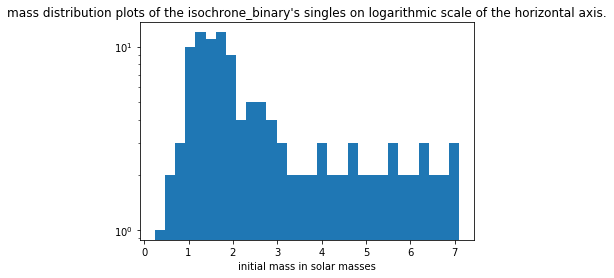

In [17]:
import matplotlib.pyplot as plt
plt.hist(iso1.singles['mass'], bins=30)
plt.yscale('log')
plt.xlabel("initial mass in solar masses")
plt.title("mass distribution plots of the isochrone_binary's singles on logarithmic scale of the horizontal axis.")

Text(0.5, 1.0, "mass distribution plots of the isochrone_binary's secondaries on logarithmic scale of the horizontal axis.")

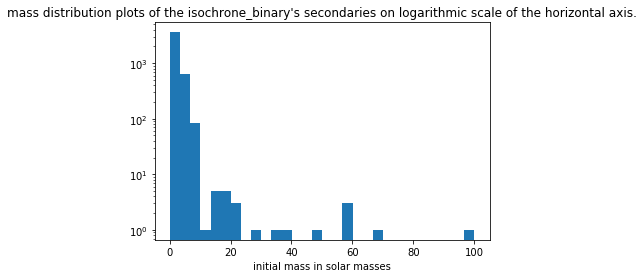

In [18]:
import matplotlib.pyplot as plt
plt.hist(iso1.secondaries['mass'], bins=30)
plt.yscale('log')
plt.xlabel("initial mass in solar masses")
plt.title("mass distribution plots of the isochrone_binary's secondaries on logarithmic scale of the horizontal axis.")

In [19]:
import numpy as np
np.where(iso1.secondaries['mass']>iso1.primaries['mass'])

(array([   0,    5,    6, ..., 4335, 4338, 4350]),)

In [20]:
np.unique(iso1.primaries[np.where(iso1.secondaries['mass']>iso1.primaries['mass'])]['source'])

2
3
4


In [21]:
clus_2.star_systems['systemMass'].sum()

9998.603789889334